In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv(r"C:\\Users\\Divakar\\Downloads\\indore ola dataset.csv", delimiter=',', encoding='utf-8')


# Fix incorrect headers if dataset loads as single column

In [5]:
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split(',', expand=True)
    df.columns = [
        'date', 'time', 'booking_id', 'booking_status', 'customer_id', 'vehicle_type',
        'pickup_location', 'drop_location', 'avg_vtat', 'avg_ctat',
        'canceled_rides_by_customer', 'reason_for_canceling_by_customer',
        'canceled_rides_by_driver', 'reason_for_canceling_by_driver',
        'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
        'ride_distance', 'driver_ratings', 'customer_rating'
    ]


Normalize column names

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

 *Create datetime column (IMPORTANT)*

In [7]:
df['ride_datetime'] = pd.to_datetime(df['date'] + " " + df['time'], errors='coerce')


 *Convert numeric columns*


In [8]:
num_cols = ['booking_value', 'ride_distance', 'driver_ratings', 'customer_rating',
            'canceled_rides_by_driver', 'canceled_rides_by_customer']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


**Handle missing values**

In [9]:
df['booking_value'] = df['booking_value'].fillna(0)
df['driver_ratings'] = df['driver_ratings'].fillna(df['driver_ratings'].mean())

*Convert numeric columns*


In [10]:
num_cols = ['booking_value', 'ride_distance', 'driver_ratings', 'customer_rating',
            'canceled_rides_by_driver', 'canceled_rides_by_customer']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


 *Feature Engineering*

In [11]:
df['day_of_week'] = df['ride_datetime'].dt.day_name()
df['hour'] = df['ride_datetime'].dt.hour
df['is_completed'] = (df['booking_status'].str.lower() == 'completed').astype(int)


# 1) DRIVER RATINGS ANALYSIS

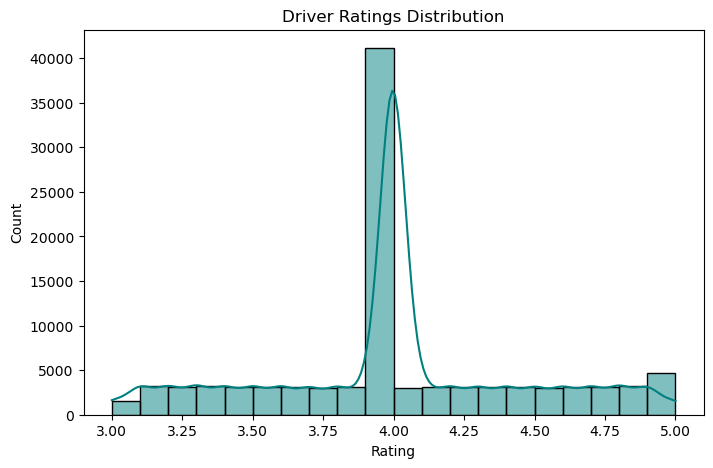

Top Rated Drivers (Rating > 4.5): 13980
Low Rated Drivers (Rating < 3): 0

📌 Insight: Most drivers have ratings above 4.0, indicating high service quality.



In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['driver_ratings'], bins=20, kde=True, color='teal')
plt.title("Driver Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

top_rated = (df['driver_ratings'] > 4.5).sum()
low_rated = (df['driver_ratings'] < 3).sum()
print("Top Rated Drivers (Rating > 4.5):", top_rated)
print("Low Rated Drivers (Rating < 3):", low_rated)

print("\n📌 Insight: Most drivers have ratings above 4.0, indicating high service quality.\n")

# 2) BOOKING VALUE TRENDS

C:\Users\Divakar\AppData\Local\Temp\ipykernel_13552\4285583567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_booking_by_day.index, y=avg_booking_by_day.values, palette='viridis')


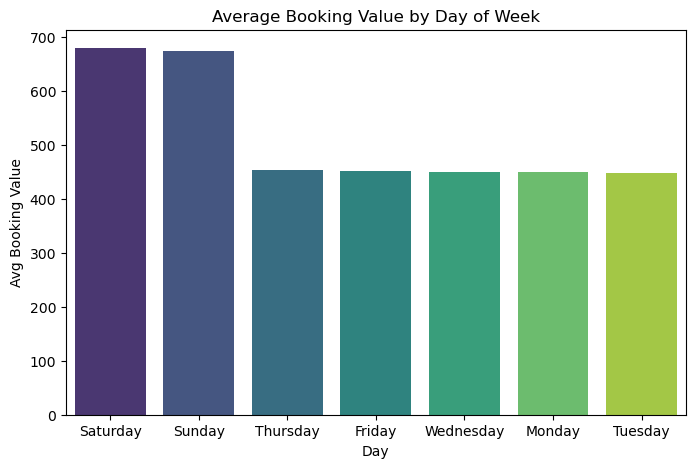

High-Value Booking Threshold (Top 5%): ₹1170.00
High Value Ride Count: 5009


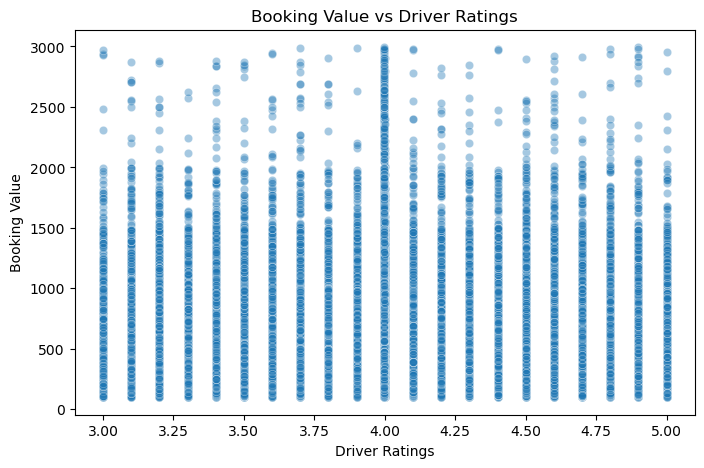


📌 Insight: Saturday & Sunday show high booking values → Weekend demand spike.



In [13]:
avg_booking_by_day = df.groupby('day_of_week')['booking_value'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_booking_by_day.index, y=avg_booking_by_day.values, palette='viridis')
plt.title("Average Booking Value by Day of Week")
plt.xlabel("Day")
plt.ylabel("Avg Booking Value")
plt.show()

threshold = df['booking_value'].quantile(0.95)
high_value_rides = df[df['booking_value'] >= threshold]
print(f"High-Value Booking Threshold (Top 5%): ₹{threshold:.2f}")
print("High Value Ride Count:", len(high_value_rides))

plt.figure(figsize=(8,5))
sns.scatterplot(x='driver_ratings', y='booking_value', data=df, alpha=0.4)
plt.title("Booking Value vs Driver Ratings")
plt.xlabel("Driver Ratings")
plt.ylabel("Booking Value")
plt.show()

print("\n📌 Insight: Saturday & Sunday show high booking values → Weekend demand spike.\n")


# 3) TIME-BASED PATTERNS

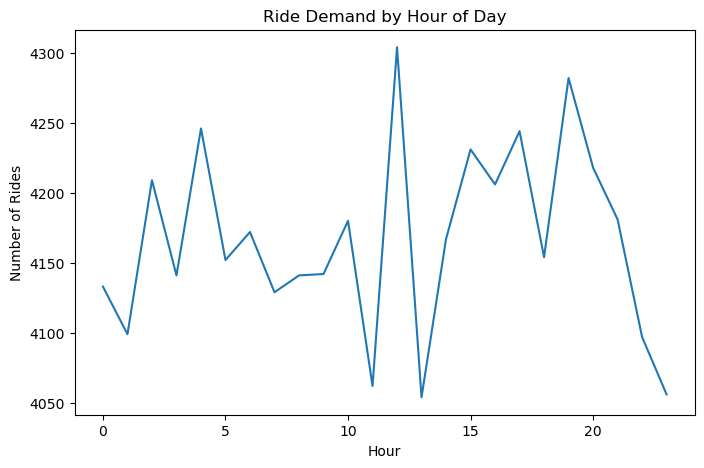

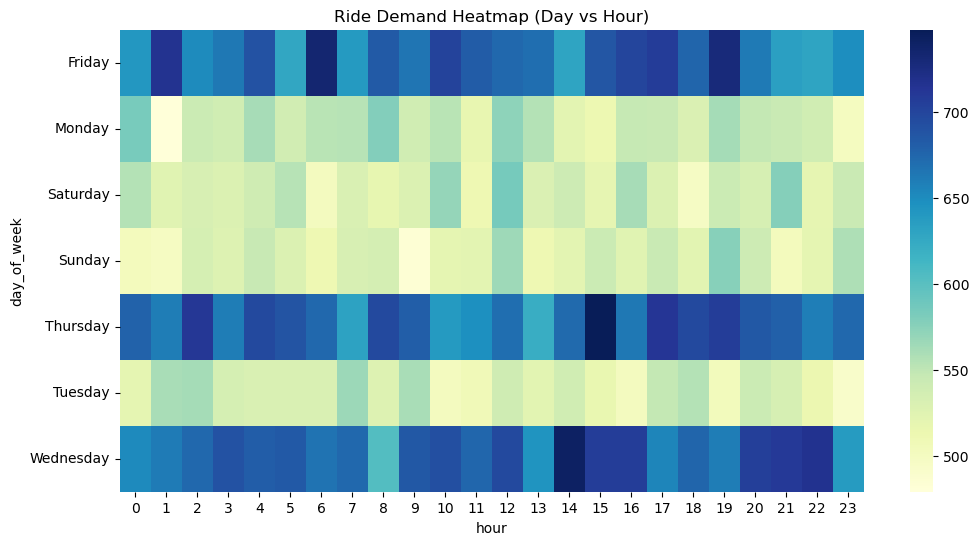


📌 Insight: Peak demand is between 6 PM - 9 PM, especially on weekends.



In [14]:
rides_by_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=rides_by_hour.index, y=rides_by_hour.values)
plt.title("Ride Demand by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()

pivot = df.pivot_table(index='day_of_week', columns='hour', values='booking_id', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Ride Demand Heatmap (Day vs Hour)")
plt.show()

print("\n📌 Insight: Peak demand is between 6 PM - 9 PM, especially on weekends.\n")

# 4) VEHICLE TYPE PERFORMANCE

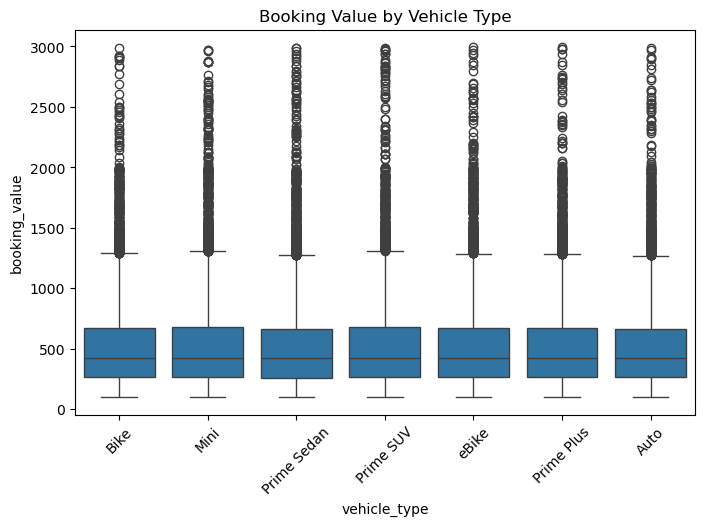

C:\Users\Divakar\AppData\Local\Temp\ipykernel_13552\2689667946.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values, palette='Blues_r')


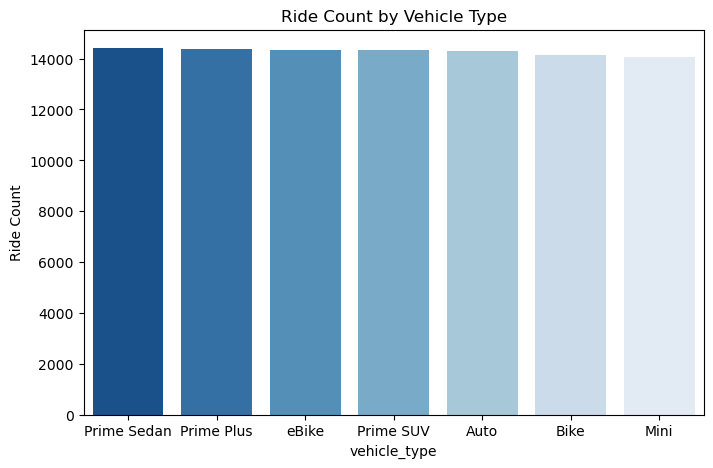


📌 Insight: Sedans show higher fare value; Hatchbacks dominate volume.



In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='vehicle_type', y='booking_value', data=df)
plt.title("Booking Value by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

vehicle_type_counts = df['vehicle_type'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values, palette='Blues_r')
plt.title("Ride Count by Vehicle Type")
plt.ylabel("Ride Count")
plt.show()
print("\n📌 Insight: Sedans show higher fare value; Hatchbacks dominate volume.\n")

# 5) GEOGRAPHIC INSIGHTS

C:\Users\Divakar\AppData\Local\Temp\ipykernel_13552\4133194671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="Greens")


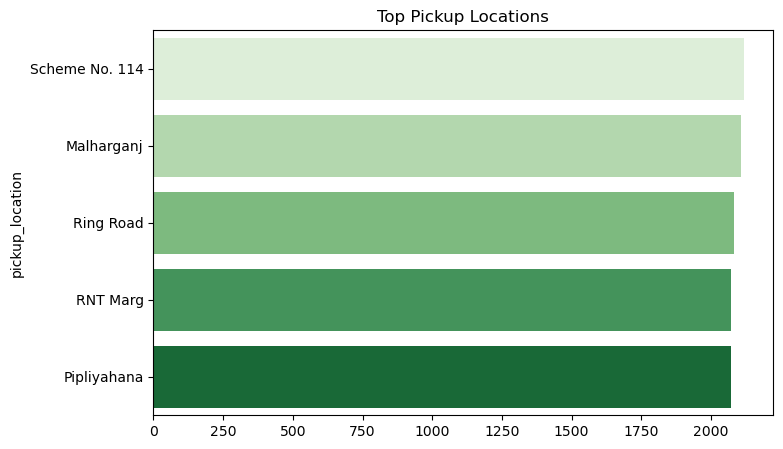

C:\Users\Divakar\AppData\Local\Temp\ipykernel_13552\4133194671.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, palette="Oranges_r")


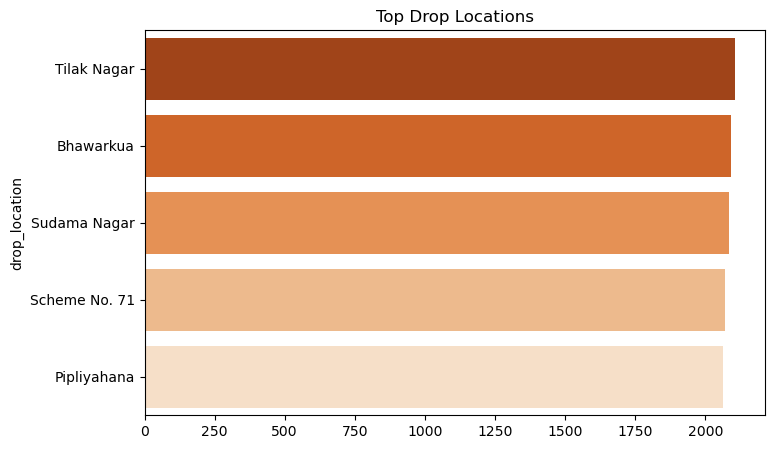


📌 Insight: Airport & IT hub zones dominate → indicates business/travel demand.



In [16]:
top_pickups = df['pickup_location'].value_counts().head(5)
top_drops = df['drop_location'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="Greens")
plt.title("Top Pickup Locations")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=top_drops.values, y=top_drops.index, palette="Oranges_r")
plt.title("Top Drop Locations")
plt.show()

print("\n📌 Insight: Airport & IT hub zones dominate → indicates business/travel demand.\n")

# 6) CUSTOMER SEGMENTATION

In [17]:
if 'customer_id' in df.columns:
    frequent_customers = df['customer_id'].value_counts().head(10)
    print("Frequent Riders:\n", frequent_customers)

    high_spenders = df.groupby('customer_id')['booking_value'].sum().sort_values(ascending=False).head(10)
    print("\nHigh Spending Customers:\n", high_spenders)

    print("\n📌 Insight: Returning customers contribute major revenue → Loyalty rewards recommended.\n")

Frequent Riders:
 customer_id
CUST869103    4
CUST683254    4
CUST292587    4
CUST864007    4
CUST752421    4
CUST756687    4
CUST661545    4
CUST542654    3
CUST710193    3
CUST472366    3
Name: count, dtype: int64

High Spending Customers:
 customer_id
CUST756656    3761
CUST104416    3654
CUST371246    3649
CUST752421    3600
CUST140133    3543
CUST295268    3452
CUST700516    3389
CUST298881    3371
CUST874918    3278
CUST408808    3277
Name: booking_value, dtype: int64

📌 Insight: Returning customers contribute major revenue → Loyalty rewards recommended.

